In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Table

import pandas
pandas.set_option('display.max_columns', None)

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [10 , 10]

In [22]:
data = Table.read('SDSS_LAB2024_photometry.fits', format='fits')
data = data.to_pandas()
data

,id,ra,dec,redshift,sdss.up,sdss.up_err,sdss.gp,sdss.gp_err,sdss.rp,sdss.rp_err,sdss.ip,sdss.ip_err,sdss.zp,sdss.zp_err
0,1237657873254907919,140.153626,39.308208,0.028312,0.119670,0.020435,1.029917,0.012816,1.621148,0.022931,1.954847,0.023217,2.286192,0.059580
1,1237657873254973544,140.325684,39.456471,0.056195,0.091612,0.006626,0.247744,0.003121,0.358206,0.004741,0.453588,0.007278,0.492240,0.025029
2,1237654880726286453,190.287293,5.309674,0.074970,0.045000,0.004752,0.214703,0.004054,0.462379,0.007594,0.667785,0.011125,0.835854,0.022765
3,1237654880727728243,193.587524,5.282654,0.048760,0.466016,0.013479,1.720028,0.006990,2.967451,0.009481,4.098367,0.018062,4.911618,0.059197
4,1237654880728842356,196.179871,5.124015,0.054671,0.147323,0.008597,0.379945,0.003792,0.529207,0.006502,0.663836,0.009359,0.737546,0.032889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92478,1237654881812545849,219.128952,5.382636,0.029722,0.130263,0.007935,0.621287,0.008810,1.230597,0.015837,1.698397,0.020601,2.189831,0.033350
92479,1237654881814511891,223.538071,5.049211,0.028227,0.050782,0.006481,0.183128,0.002653,0.343451,0.003437,0.469283,0.005994,0.610483,0.021694
92480,1237651823782396044,214.389114,5.217847,0.079587,0.126914,0.013361,0.634937,0.021585,1.301933,0.033164,1.929476,0.038042,2.559679,0.063614
92481,1237651823782985830,215.724396,5.183447,0.056425,0.101443,0.014067,0.449638,0.008164,0.778556,0.010234,0.989564,0.016335,1.230477,0.053690


In [23]:
def Plot(row_index):
    row = data.T[row_index]
    x = np.array([3540, 4750, 6220, 7630, 9050])
    y = np.array([row['sdss.up'], row['sdss.gp'], row['sdss.rp'], row['sdss.ip'], row['sdss.zp']])
    y_err = np.array([row['sdss.up_err'], row['sdss.gp_err'], row['sdss.rp_err'], row['sdss.ip_err'], row['sdss.zp_err']])
    plt.errorbar(x, y, yerr=y_err, ls='--',  fmt='o', color='deepskyblue', ecolor='grey', capsize=4, capthick=2)
    plt.ylim(0)
    plt.xlabel('$\lambda [A]$')
    plt.ylabel('$f_\\nu$')

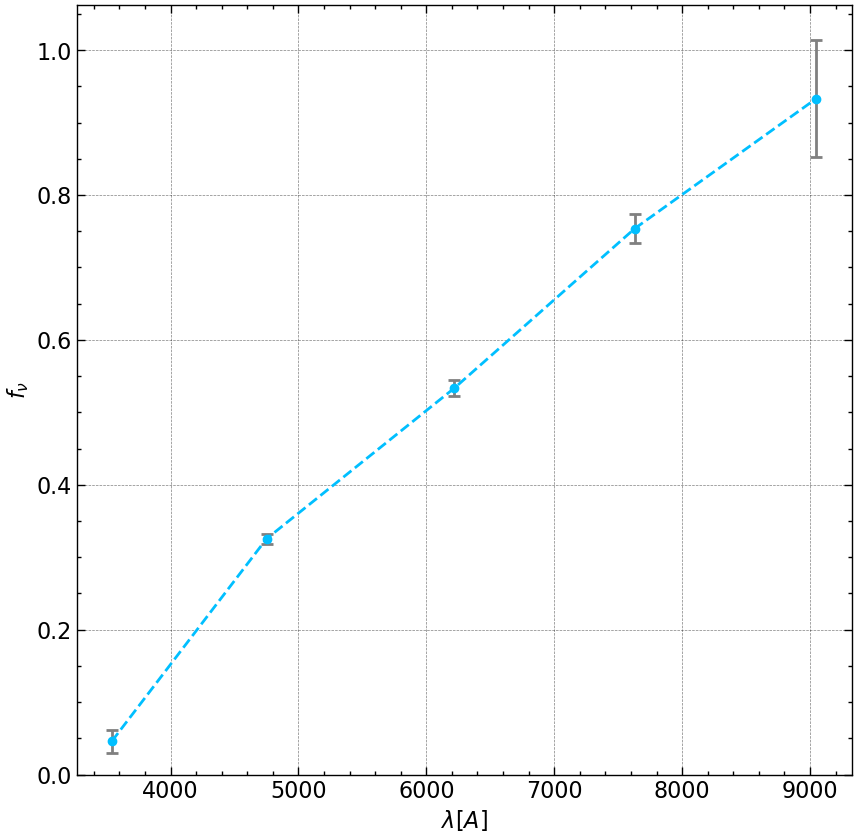

In [24]:
Plot(2000)

In [25]:
results = Table.read('./out/results.fits', format='fits')
results = results.to_pandas()
results

,id,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.sdss.gp,bayes.sdss.gp_err,bayes.sdss.ip,bayes.sdss.ip_err,bayes.sdss.rp,bayes.sdss.rp_err,bayes.sdss.up,bayes.sdss.up_err,bayes.sdss.zp,bayes.sdss.zp_err,best.chi_square,best.reduced_chi_square,best.attenuation.B_B90,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.FUV,best.attenuation.V_B90,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.nebular.ne,best.nebular.zgas,best.sfh.age,best.sfh.burst_age,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.sdss.up,best.sdss.gp,best.sdss.rp,best.sdss.ip,best.sdss.zp
0,1237657873254907919,0.032267,0.161923,0.048622,0.197202,0.033261,0.164010,0.797908,0.068507,1.969379,0.048555,1.460353,0.025042,0.161913,0.016461,2.543351,0.127251,7.625405,1.906351,1.556043,0.308,0.70,0.308,0.70,0.308,0.70,3.080168,1.252106,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,500.0,20.0,0.0,0.1,5.0,495.479626,1.0,0.02,10.0,13368.111980,3.803276e+24,0.028312,5.620173e+32,7.644487e-06,1.221240e+33,1.603778e-05,3.268753e+36,2.090537e-04,3.270536e+36,5.750467e+09,4.736286e-41,1.037874e-33,1.366758e-40,6.135353e+36,4.207964e+33,4.207964e+33,3.251842e-05,6.135353e+36,2.487385e-04,2.045132e+09,2.045132e+09,1.133970e-34,3.705335e+09,3.705335e+09,1.253361e-33,8.238682e+50,8.238682e+50,9.724360e+12,0.160864,0.858100,1.465039,1.971238,2.530620
1,1237657873254973544,1.414014,1.324504,1.526757,1.714235,1.420607,1.334441,0.241851,0.011770,0.444983,0.014077,0.346434,0.009233,0.092970,0.008964,0.521151,0.029532,0.108212,0.027053,0.124105,0.022,0.05,0.022,0.05,0.022,0.05,0.379392,0.096066,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1800.0,20.0,0.0,0.1,600.0,1275.001836,1.0,0.02,10.0,13003.015620,7.708407e+24,0.056195,9.333544e+31,1.093765e+34,2.408879e+32,2.743733e+34,1.914418e+35,2.345855e+35,4.647365e+35,3.686554e+09,3.222010e-01,3.503150e-01,3.246304e-01,3.528040e+36,1.589821e+35,3.552207e+33,1.554299e+35,2.726088e+36,8.019519e+35,1.479037e+09,1.478844e+09,1.931444e+05,2.207517e+09,2.204464e+09,3.053158e+06,4.789940e+52,8.247713e+50,4.707463e+52,0.091090,0.249662,0.364205,0.443718,0.504696
2,1237654880726286453,0.829063,1.876155,0.854617,1.910678,0.831124,1.878950,0.208050,0.010722,0.654742,0.018990,0.458180,0.018598,0.044457,0.005296,0.876812,0.046323,0.074084,0.018521,0.660434,0.132,0.30,0.132,0.30,0.132,0.30,1.424240,0.534394,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1800.0,20.0,0.0,0.1,150.0,1649.101926,1.0,0.02,10.0,12764.994344,1.042477e+25,0.074970,1.445794e+33,8.357579e+31,3.392945e+33,1.819830e+32,2.113824e+36,1.541130e+33,2.120470e+36,2.041371e+10,8.389731e-04,1.188714e-03,8.646822e-04,8.882317e+36,1.520782e+34,1.480000e+34,4.078284e+

Text(0.5, 0, 'SFR $[M_\\odot/yr]$')

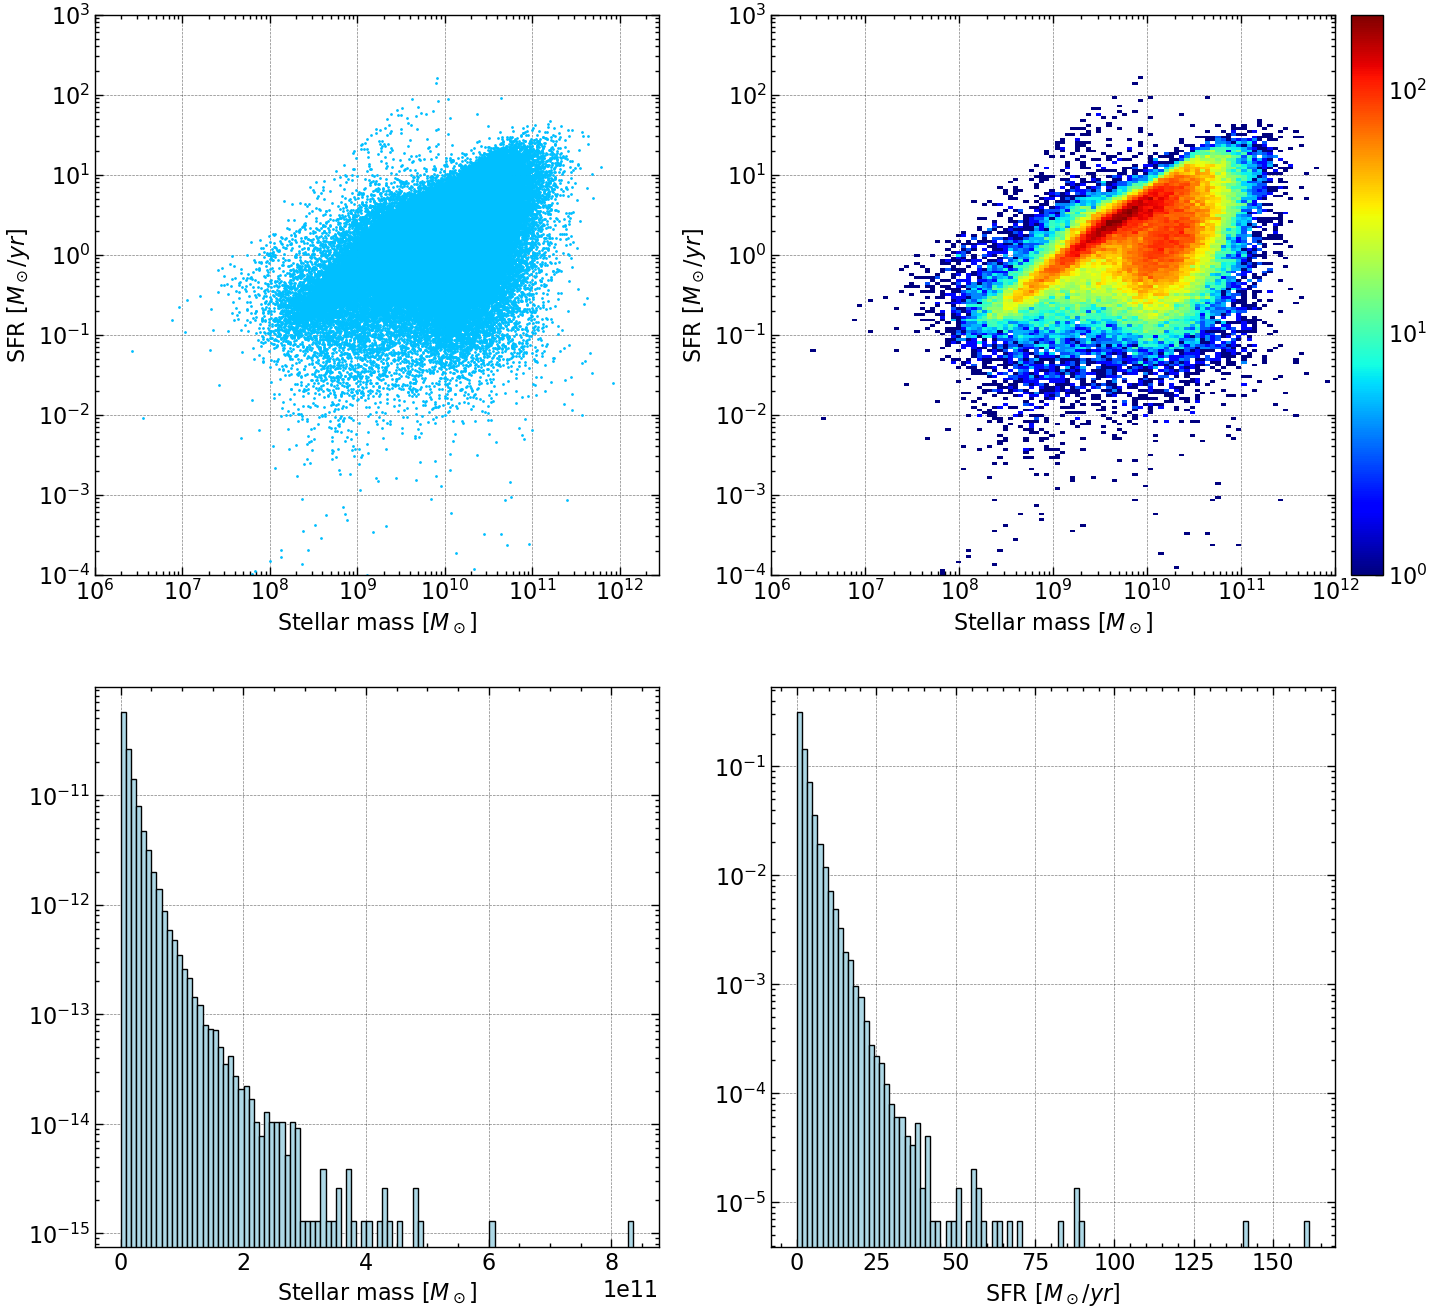

In [67]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']

plt.rcParams['figure.figsize'] = [16 , 16]
fig, axes = plt.subplots(2, 2)

ax = axes[0, 0]
ax.scatter(x_data, y_data, s=1, color='deepskyblue')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e6)
ax.set_ylim(1e-4, 1e3)
ax.set_xlabel('Stellar mass $[M_\odot]$')
ax.set_ylabel('SFR $[M_\odot/yr]$')

ax = axes[0, 1]
binx = np.logspace(start=1, stop=12, num=200)
biny = np.logspace(start=-4, stop=3, num=200)
hist = ax.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e6)
ax.set_ylim(1e-4, 1e3)
ax.set_xlabel('Stellar mass $[M_\odot]$')
ax.set_ylabel('SFR $[M_\odot/yr]$')
cax = fig.add_axes([0.91, 0.53, 0.02, 0.35])
fig.colorbar(hist[3], cax=cax)

ax = axes[1, 0]
ax.hist(x_data, bins=100, density=True, color='lightblue', edgecolor='black')
ax.set_yscale('log')
ax.set_xlabel('Stellar mass $[M_\odot]$')

ax = axes[1, 1]
ax.hist(y_data, bins=100, density=True, color='lightblue', edgecolor='black')
ax.set_yscale('log')
ax.set_xlabel('SFR $[M_\odot/yr]$')